# DIABETES

**Which health and Circumstantial factors influence the most on cases of diabetes and pre-diabetes?**

### Data Exploration

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [13]:
# Read the diabetes_012 file
file_path = '/Users/jordicatafal/Documents/GitHub/Data-Mining-I/Project/diabetes_012_health_indicators_BRFSS2015.csv'
diabetes_data = pd.read_csv(file_path)

# Basic information about the dataset
print(diabetes_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [14]:
# Display the first 5 rows of the dataset
print(diabetes_data.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [15]:
# Get summary statistics of the dataset
print(diabetes_data.describe())

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000  

----------------------

First we have the variable **Diabetes_012**, with a mean of 0.296921, which suggest that about 29.7% of the dataset has some form of diabetes or pre-diabetes. Also, having a max value of 2 confirm that is coded as: 0 (No diabetes), 1 (Pre-diabetes), 2 (Diabetes)

Then we found a bunch of binary variables, since they have values 0 or 1. 

They are the following:
- **HighBP** (42.9% positive)
- **HighChol** (42.4% positive)
- **CholCheck** (96.3% positive)
- **Smoker** (44.3% positive)
- **Stroke** (4.1% positive)
- **HeartDiseaseorAttack** (9.4% positive)
- **PhysActivity** (75.7% positive)
- **AnyHealthcare** (95.1% positive)
- **NoDocbcCost** (8.4% positive)
- **DiffWalk** (16.8% positive)

On the other hand, we have the variable **BMI** (Body mass index), with a mean of 28.38. 
And from this variable we can see that the range (12 to 98) seems very wide, here we might want to check for potential outliers.

We have the variable **Age** with a mean of 8.03. Which might suggest us that it could be coded into categories, so we will have to check it out.

**Education** and **Income** also appear to be categorical variables, with ranges from 1 to 6 and 1 to 8, respectively.

Finally there are several Health Metrics, such as **GenHlth** with ranges from 1 to 5 (mean of 2.51), **MentHlth** and **PhysHlth** both range from 0 to 30, with means of 3.18 and 4.24 respectively.


--------------

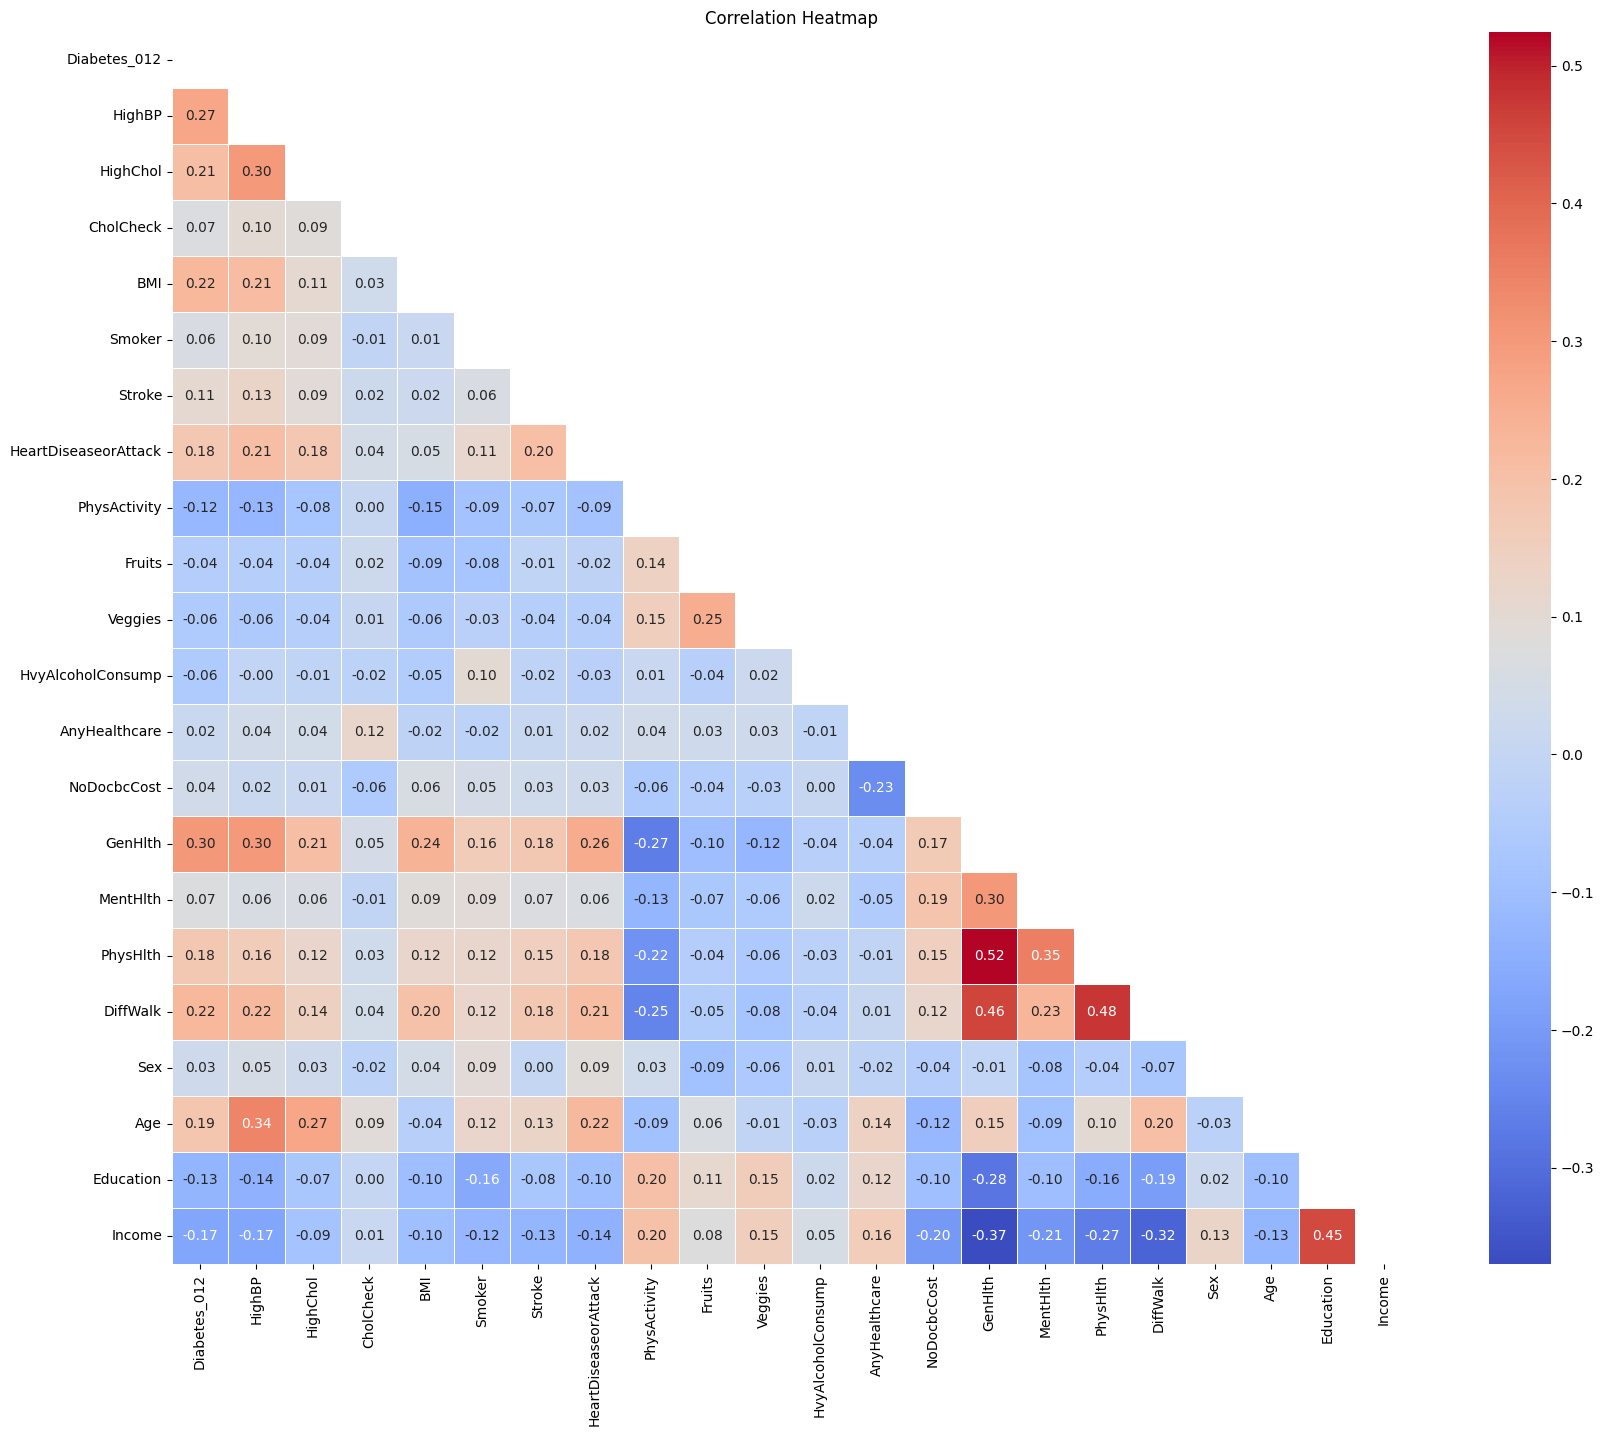

In [16]:
# Correlation heatmap
plt.figure(figsize=(20,16))
correlation = diabetes_data.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

-------

*Correlations with Diabetes_012*
- The strongest positive correlations are with:
    - GenHlth (0.30): General Health
    - HighBP (0.27): High Blood Pressure
    - BMI (0.22): Body Mass Index
    - HighChol (0.21): High Cholesterol
    - DiffWalk (0.22): Difficulty Walking
    - Age (0.19)

- The storngest negative correaltions are with:
    - Income (-0.17)
    - Education (-0.13)
    - PhysActivity (-0.12): Physical Activity


*Other notable correlations*
- PhysHlth and MentHlth have a strong positive correlation (0.52), suggesting a relationship between physical and mental health.
- Age has moderate positive correlations with HighBP (0.34) and HighChol (0.27).
- Education and Income have a moderate positive correlation (0.45).


*Variables with low correlations*
- Sex, HvyAlcoholConsump (Heavy Alcohol Consumption), and AnyHealthcare show relatively low correlations with most other variables, including Diabetes_012.


We can find several interesting patterns with this correlation map:
- Health-related variables (GenHlth, HighBP, BMI, HighChol) tend to have positive correlations with each other and with Diabetes_012.
- Lifestyle factors like PhysActivity and Income have negative correlations with Diabetes_012, suggesting they might be protective factors.
- Some variables show moderate correlations with each other (e.g., PhysHlth and GenHlth at 0.52), which might need to be considered in more complex analyses, to check if there is multicollinearity, which would be difficult to determine the individual effect of each variable on the outcome in the case there were correlated.


In [17]:
# Identify key features based on correlation with Diabetes_012
correlation_with_target = correlation['Diabetes_012'].abs().sort_values(ascending=False)
print("Top 6 features correlated with Diabetes_012:")
print(correlation_with_target[1:7])  # 7 to include Diabetes_012 itself

# Select top 6 correlated features (excluding Diabetes_012)
top_features = correlation_with_target[1:7].index.tolist()

negative_correlated = ["Education", "Income", "PhysActivity"]
 

Top 6 features correlated with Diabetes_012:
GenHlth     0.302587
HighBP      0.271596
BMI         0.224379
DiffWalk    0.224239
HighChol    0.209085
Age         0.185026
Name: Diabetes_012, dtype: float64


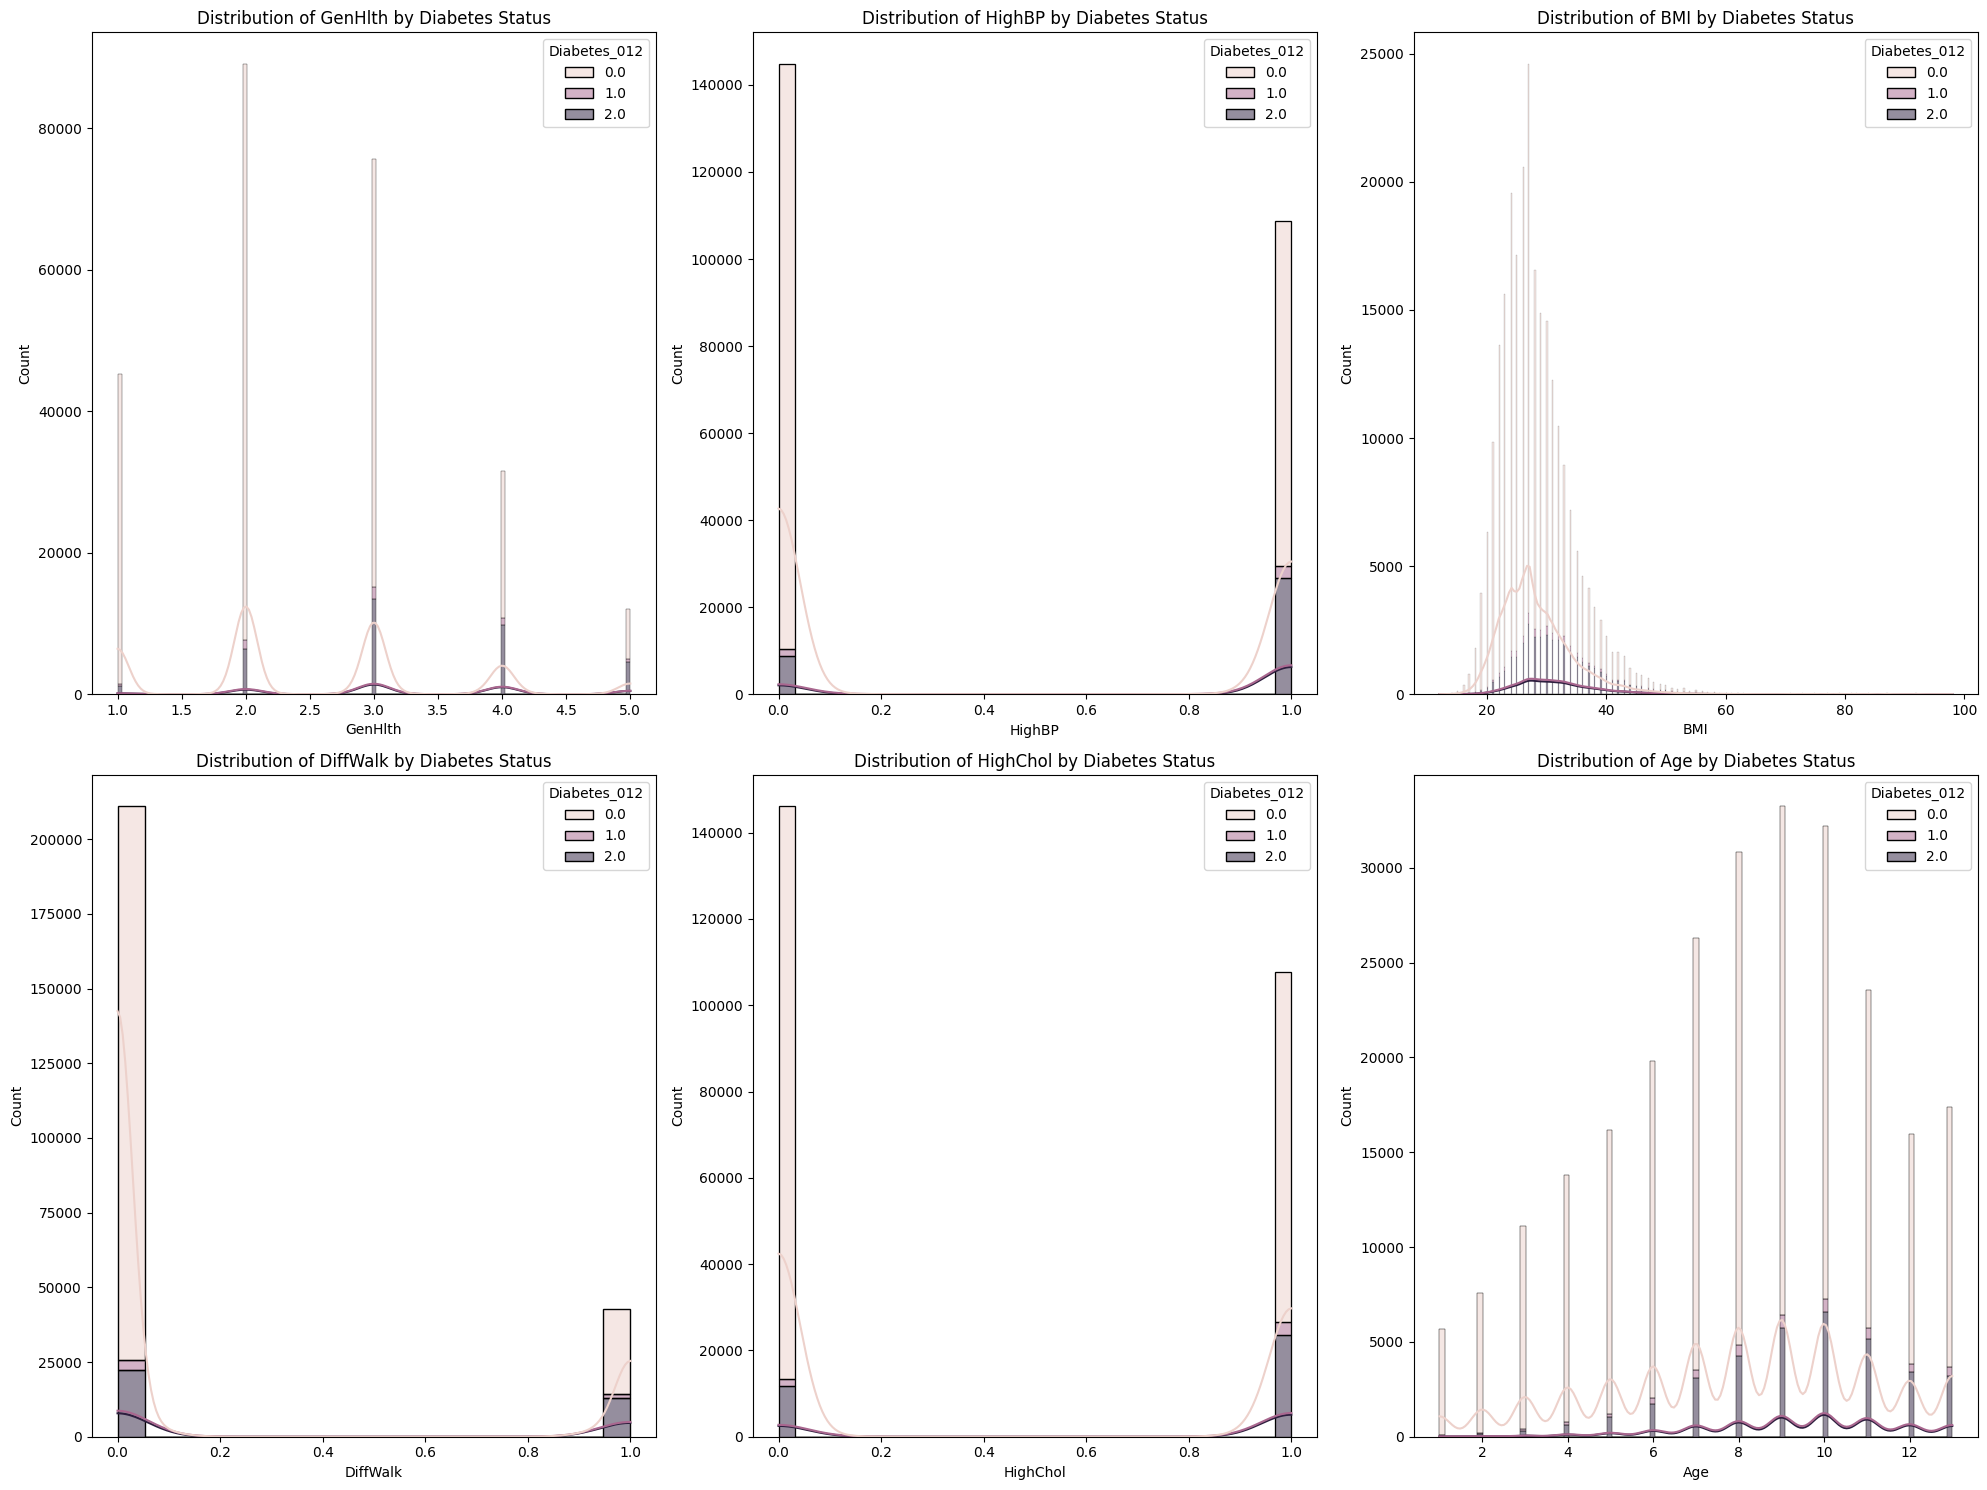

In [18]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Create subplots for key features
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=diabetes_data, x=feature, hue='Diabetes_012', kde=True, multiple="stack")
    plt.title(f'Distribution of {feature} by Diabetes Status')

plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

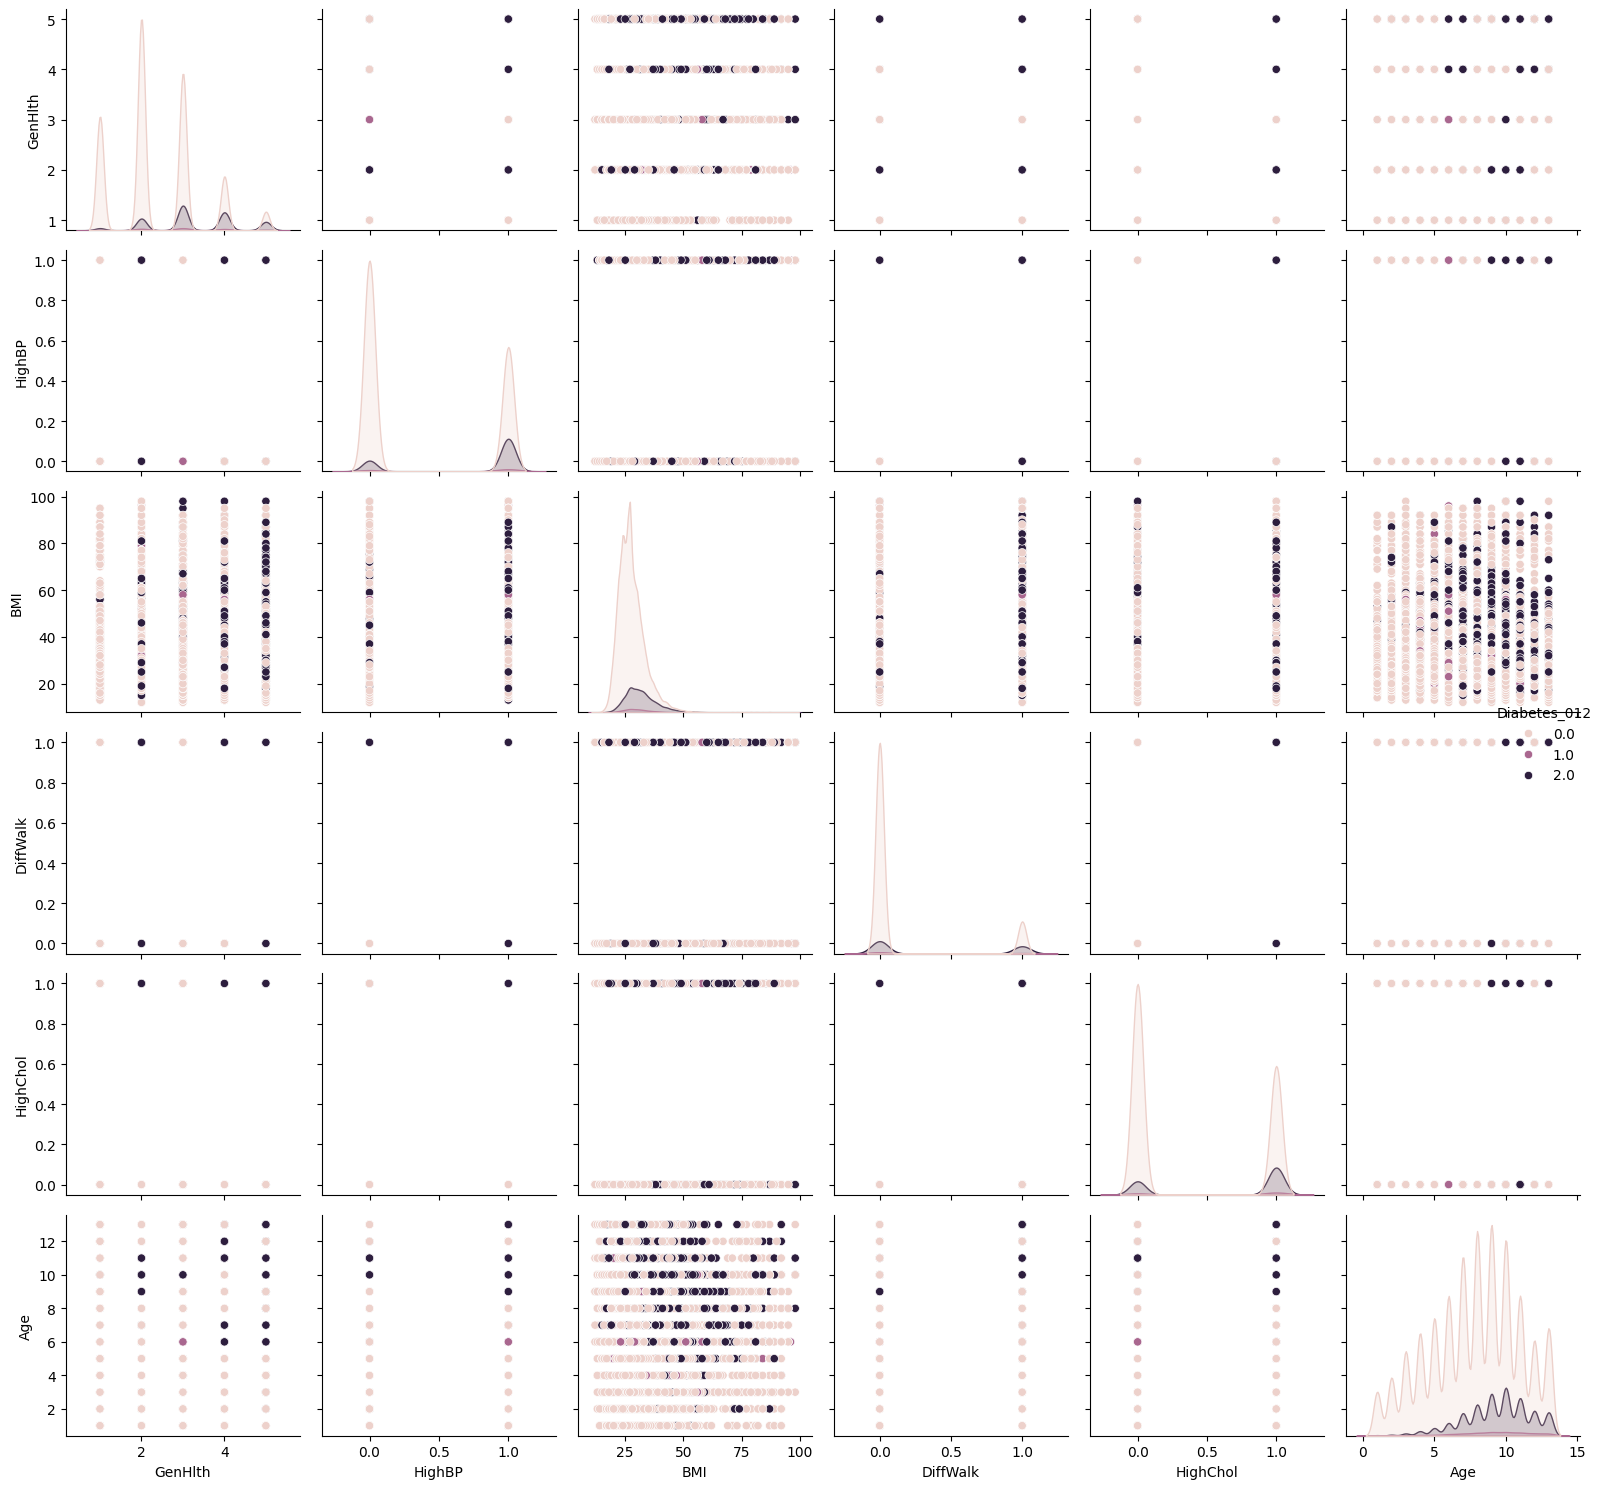

In [19]:
# Create pairplot for top correlated features
plt.figure(figsize=(20, 20))
sns.pairplot(diabetes_data[top_features + ['Diabetes_012']], hue='Diabetes_012')
plt.tight_layout()
plt.show()

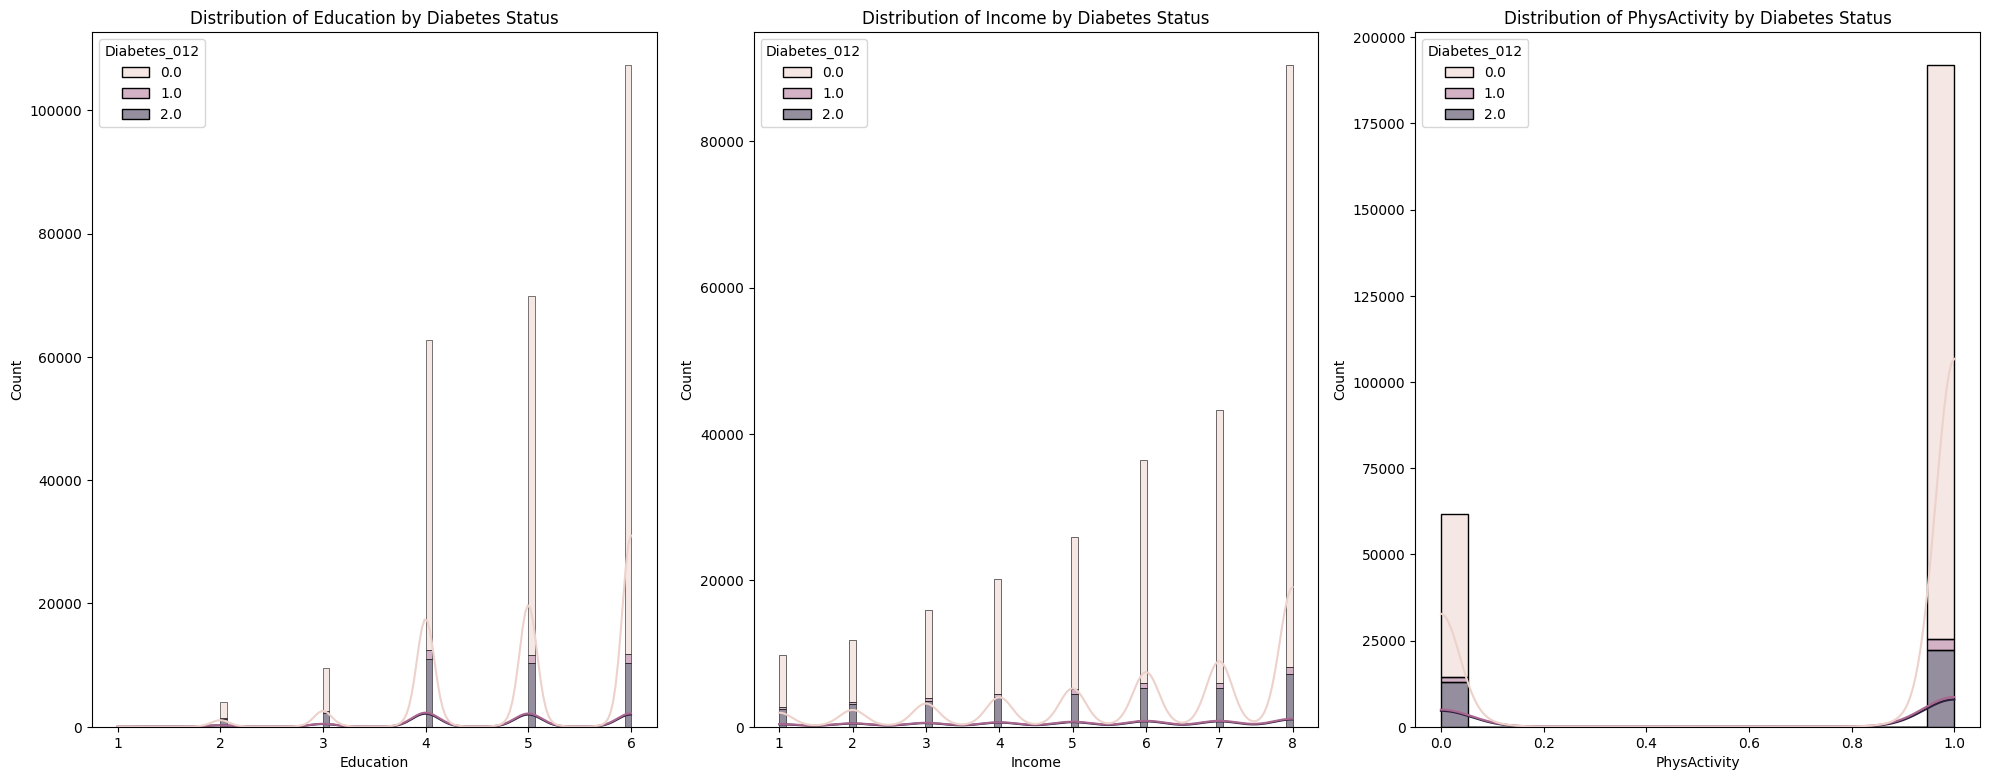

In [20]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Create subplots for negative correlated features
for i, feature in enumerate(negative_correlated, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=diabetes_data, x=feature, hue='Diabetes_012', kde=True, multiple="stack")
    plt.title(f'Distribution of {feature} by Diabetes Status')

plt.tight_layout()
plt.show()

In [21]:
# Check for missing values
print(diabetes_data.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
